# CMPINF 2100: Final Exam

## Vedant Kansara

### Assigned: Monday December 13, 2021

### DUE: Saturday December 18, 2021 at 5:00PM EST

You may add as many code and markdown cells as you see fit to answer the questions.

#### You are **NOT** allowed to collaborate with anyone on this exam!


### Overview

The final exam is focused on the primary concepts of the second half of the semester. You will fit multiple regression models and multiple binary classification models. You will interpret the coefficients of the models and select the best performing model for each application.

You must download the `final_prob01.csv` and the `final_prob02.csv` files from Canvas before starting the exam. You will work with `final_prob01.csv` in Problem 1, and you will work with `final_prob02.csv` in Problem 2.

## Import modules

The four "main" modules that we have used throughout the semester are imported in for you below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

The relevant additional methods and functions that you will use in this exam are imported within the questions.

## Problem 1: Regression - 50 points

Read in the `final_prob01.csv` CSV file as a Pandas dataframe in the cell below. Assign the data set to an object named `df1`. You will see that this data set consists of 5 continuous inputs, `x1` through `x5`, and a continuous response, `y`.

In [2]:
### read the data here
df_1 = pd.read_csv('final_prob01.csv')


### 1a)
How many rows are in the data set? Double check the data types associated with each of the variables.

#### 1a) - SOLUTION

In [3]:
df_1.shape

(110, 6)

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      110 non-null    float64
 1   x2      110 non-null    float64
 2   x3      110 non-null    float64
 3   x4      110 non-null    float64
 4   x5      110 non-null    float64
 5   y       110 non-null    float64
dtypes: float64(6)
memory usage: 5.3 KB


In [5]:
df_1.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

### 1b)
What are the means, standard deviations, min and max values for each of the variables? Visualize the summary statistics with boxplots. Are the variables all roughly covering the same range?

#### 1b) - SOLUTION

In [6]:
df_1.describe()

,x1,x2,x3,x4,x5,y
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,-0.035361,0.029356,0.034077,0.206676,-0.016708,-0.015383
std,1.105884,1.000596,1.158145,1.085244,0.927250,3.146428
min,-3.136652,-2.725713,-2.427799,-1.879309,-2.042584,-10.627677
25%,-0.860105,-0.652197,-0.801266,-0.532813,-0.604332,-1.225560
50%,-0.113053,0.043325,0.064104,0.281610,-0.007597,0.293134
75%,0.607403,0.666692,0.848492,0.983076,0.617831,1.510491
max,2.916081,2.714255,2.492980,2.397799,3.289022,7.623098


In [7]:
df_inputs = df_1.drop(columns=['y'])

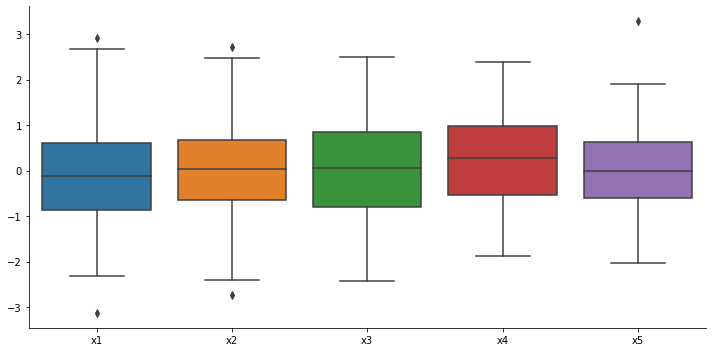

In [8]:
sns.catplot(data = df_inputs, kind = 'box', aspect = 2)

plt.show()

Yes all the variables are roughly covering the same range.

### 1c)
Are the inputs highly correlated or anticorrelated with each other?

#### 1c) - SOLUTION

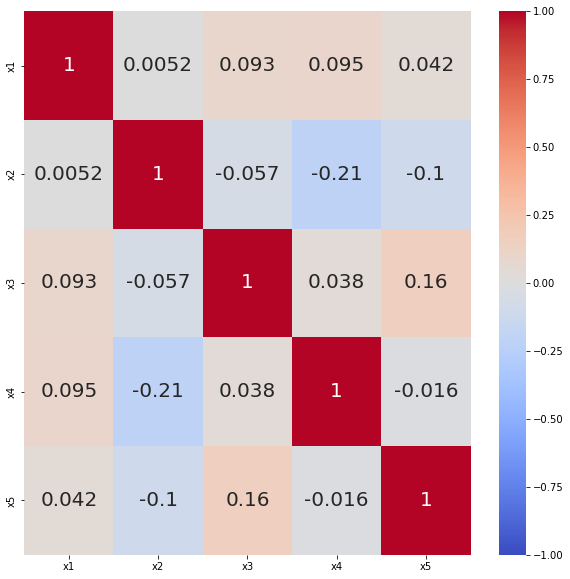

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data = df_inputs.corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 20},
            ax=ax)

plt.show()

### 1d)
Create scatter plots between the response, `y`, and each of the 4 continuous inputs. 

#### 1d) - SOLUTION

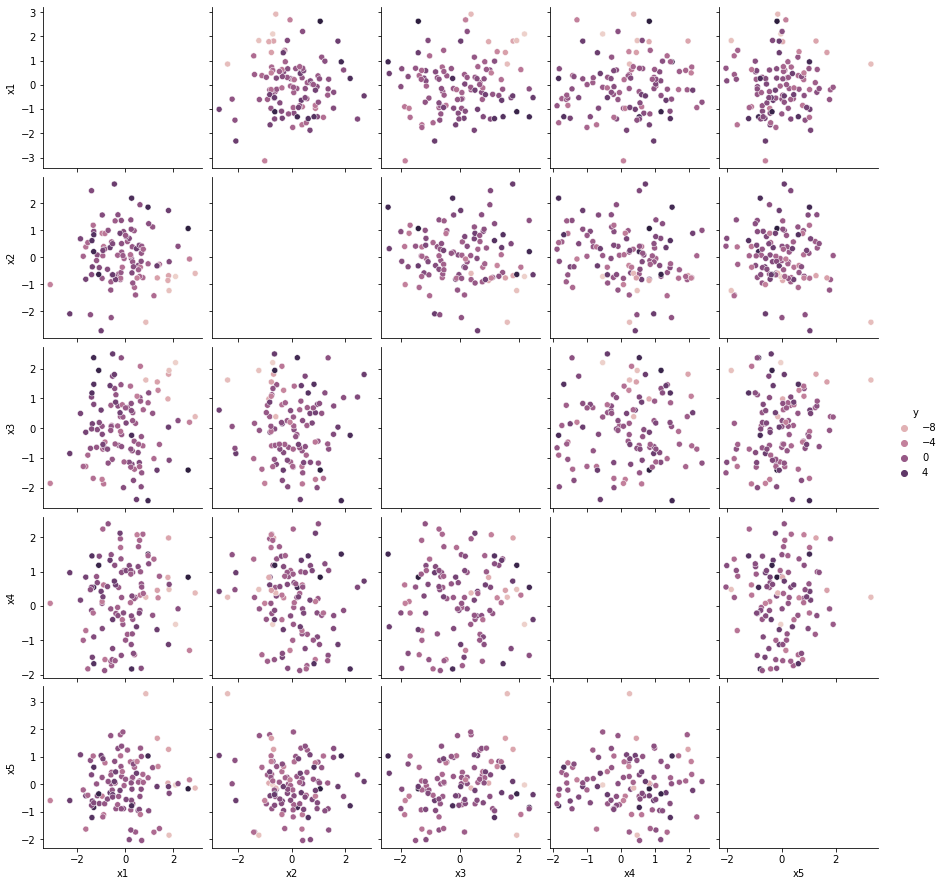

In [10]:
sns.pairplot(data = df_1, hue='y', diag_kws={'common_norm': False})

plt.show()

### 1e)
You will fit 3 linear models using `statsmodels`. The `statsmodels` formula api is imported in for you below.

In [11]:
import statsmodels.formula.api as smf

You must fit the following linear models:

* All linear additive terms
* All pair-wise interactions between the inputs
* Up to all 4-way interactions between the inputs

Assign the model with linear additive terms to the object, `fit1_add`. Assign the model with up to all pair-wise interactions to the object, `fit1_pairs`. Assign the model with up to all 4-way interactions between the inputs to the object `fit1_4way`.  

Display the summary of each model to the screen.

#### 1e) - SOLUTION

In [12]:
formula1_add = 'y ~ x1 + x2 + x3 + x4 + x5'
formula1_pairs = 'y ~ (x1 + x2 + x3 + x4 + x5) ** 2'
formula1_4way = 'y ~ (x1 + x2 + x3 + x4 + x5) ** 4'

In [13]:
fit1_add = smf.ols(formula = formula1_add, data = df_1).fit()

In [14]:
print(fit1_add.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     6.840
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.49e-05
Time:                        16:24:54   Log-Likelihood:                -266.03
No. Observations:                 110   AIC:                             544.1
Df Residuals:                     104   BIC:                             560.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1259      0.272     -0.462      0.6

In [15]:
fit1_pairs = smf.ols(formula = formula1_pairs, data = df_1).fit()

In [16]:
print(fit1_pairs.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     50.17
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           4.20e-38
Time:                        16:24:54   Log-Likelihood:                -160.79
No. Observations:                 110   AIC:                             353.6
Df Residuals:                      94   BIC:                             396.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.117      1.075      0.2

In [17]:
fit1_4way = smf.ols(formula = formula1_4way, data = df_1).fit()

In [18]:
print(fit1_4way.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     26.94
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.52e-30
Time:                        16:24:54   Log-Likelihood:                -148.64
No. Observations:                 110   AIC:                             359.3
Df Residuals:                      79   BIC:                             443.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1729      0.123      1.410      

### 1f)
The additive and pair-wise interaction models are subsets of the model with up to all 4-way interactions. Thus, all three models have some features in common. Which features are statistically significant (based on the 5% significance level, thus using the 95% confidence interval) in the three models? Are any features significant in all three models?

To help, the cell below defines the `my_coefplot()` function to visualize coefficient estimates and confidence intervals.

In [19]:
def my_coefplot(model_object, figsize_use=(10, 5)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar(y = model_object.params.index,
               x = model_object.params,
               fmt = 'o', color = 'steelblue', ecolor='steelblue',
               xerr = 2 * model_object.bse,
               elinewidth = 3, ms=10)
    
    ax.axvline(x = 0, linestyle='--', linewidth=5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

#### 1f) - SOLUTION

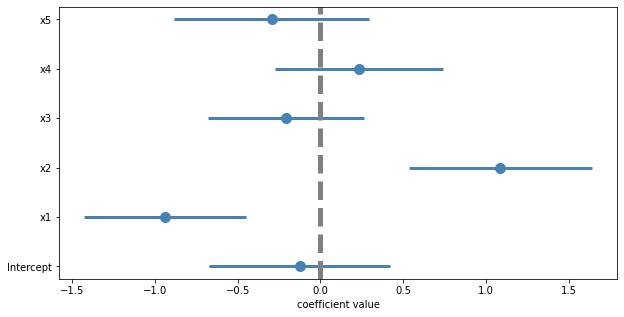

In [20]:
my_coefplot(fit1_add)

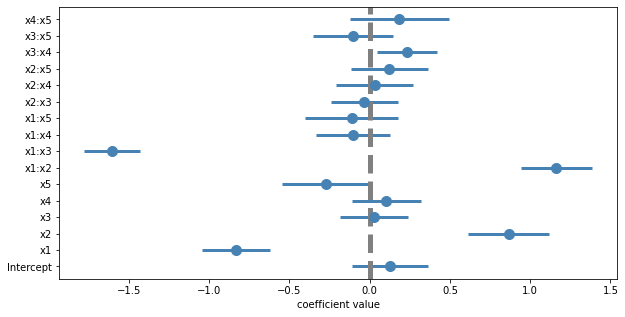

In [21]:
my_coefplot(fit1_pairs)

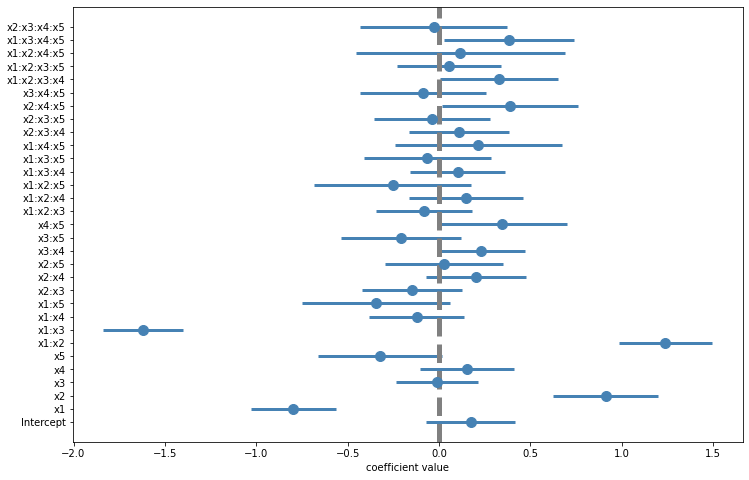

In [22]:
my_coefplot(fit1_4way, figsize_use=(12,8))

### 1g)
Which of the three models is considered to be the best performing model based on R-squared? Your assessment should be based on the complete data set used to fit the models.

#### 1g) - SOLUTION

In [23]:
fit1_add.rsquared

0.2474728891878183

In [24]:
fit1_pairs.rsquared

0.8889629678553271

In [25]:
fit1_4way.rsquared

0.9109676322235685

In the 4way interaction model the value of R-sqaure is highest so this is the best performing model.

### 1h)
Your assessment in 1g) was based just on the training set. You will now use cross-validation to train and assess the three models. The cell below imports methods from sklearn and patsy to allow you to train and compare linear regression models with cross-validation.

In [26]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

You must use 5-fold cross-validation to train and assess the three models you fit previously. You may use the `cross_val_score()` function and you must use the `neg_mean_squared_error` scoring function (the negative of the Mean Squared Error (MSE) ). 

Which model is the best based on 5-fold cross-validation?

You do not need to standardize the features before performing the cross-validation for the exam.

#### 1h) - SOLUTION

In [27]:
kf05 = KFold(n_splits=5, shuffle=True, random_state=101)

In [28]:
y_add1, X_add1 = dmatrices(formula1_add + ' - 1', data = df_1)
y_pairs1, X_pairs1 = dmatrices(formula1_pairs + ' - 1', data = df_1)
y_4way1, X_4way1 = dmatrices(formula1_4way + ' - 1', data = df_1)

In [29]:
fit1_all = LinearRegression()

fit1_pairs = LinearRegression()

fit1_4way = LinearRegression()


In [30]:
test_accuracy_fit1_all = cross_val_score( fit1_all, X_add1, y_add1.ravel(), cv=kf05, scoring='neg_mean_squared_error')

test_accuracy_fit1_pairs = cross_val_score( fit1_pairs, X_pairs1, y_pairs1.ravel(), cv=kf05, scoring='neg_mean_squared_error')

test_accuracy_fit1_4way = cross_val_score( fit1_4way, X_4way1, y_4way1.ravel(), cv=kf05, scoring='neg_mean_squared_error')

In [31]:
test_accuracy_fit1_all

array([-9.34259215, -7.21760025, -8.11527506, -9.18203763, -7.59381557])

In [32]:
test_accuracy_fit1_pairs

array([-1.52379211, -1.15601728, -2.0858619 , -1.66659918, -1.67616843])

In [33]:
test_accuracy_fit1_4way

array([-1.84551025, -1.62380758, -3.13042879, -3.77763727, -1.97184878])

### 1i)
Regardless of your answer in 1h), you will now fit the model with up to all pair-wise interactions using lasso regression. You must tune the `alpha` parameter (the regularization strength) using 5-fold cross-validation. You do not need to standardize the features for the exam and you may use the built-in cross-validation method for Lasso which is imported in for you below.

In [34]:
from sklearn.linear_model import LassoCV

You must try 101 values for the `alpha` parameter. Assign the result to the `lasso_cv_1` object.

What is the optimal `alpha` parameter value according to 5-fold cross-validation?

#### 1i) - SOLUTION

In [35]:
lasso_alpha = np.exp(np.linspace(-3.5, 3.5, num=121))

In [36]:
lasso_cv_1 = LassoCV( n_alphas= 101, cv=kf05, max_iter=5001, fit_intercept=True).fit(X_4way1, y_4way1.ravel())

In [37]:
lasso_cv_1.alpha_

0.0903981205410406

### 1j)
Display the coefficients associated with the optimal or best lasso model to the screen. How many coefficients have been "turned off" and set to zero?

#### 1j) - SOLUTION

In [38]:
lasso_cv_1.coef_

array([-0.74929248,  0.74742258, -0.        ,  0.01588336, -0.09790827,
        1.0797285 , -1.55824081, -0.04390951, -0.        ,  0.        ,
        0.        ,  0.04087746,  0.11158949, -0.14093308,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.06839721, -0.02919844,
        0.00210817,  0.0131489 , -0.        ,  0.08386754, -0.        ])

15 features are turned off.

## Problem 2 - Binary classification - 50 points

Read in the `final_prob02.csv` CSV file as a Pandas dataframe in the cell below. Assign the data set to an object named `df2`. You will see that this data set consists of 5 continuous inputs, `x1` through `x5`, and a binary outcome, `y`.

In [39]:
### read in the data here
df_2 = pd.read_csv('final_prob02.csv')

In [40]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      220 non-null    float64
 1   x2      220 non-null    float64
 2   x3      220 non-null    float64
 3   x4      220 non-null    float64
 4   x5      220 non-null    float64
 5   y       220 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.4 KB


In [41]:
df_2.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

### 2a)
How many rows are in the data set? What is the data type associated with the binary outcome `y`?

#### 2a) - SOLUTION

In [42]:
df_2.shape

(220, 6)

There are 220 rows and 6 columns. And the data type associated with `y` is `int`

### 2b)
What are the unique values of `y` and how many rows are associated with each unique value?

#### 2b) - SOLUTION

In [43]:
df_2.y.nunique()

2

THere are 2 unique values of `y`

In [44]:
df_2.y.value_counts()

0    118
1    102
Name: y, dtype: int64

### 2c)
Visualize the summary statistics associated with the input features using boxplots. Do the inputs roughly cover the same range?

#### 2c) - SOLUTION

In [45]:
df_input = df_2.drop(columns=['y'])

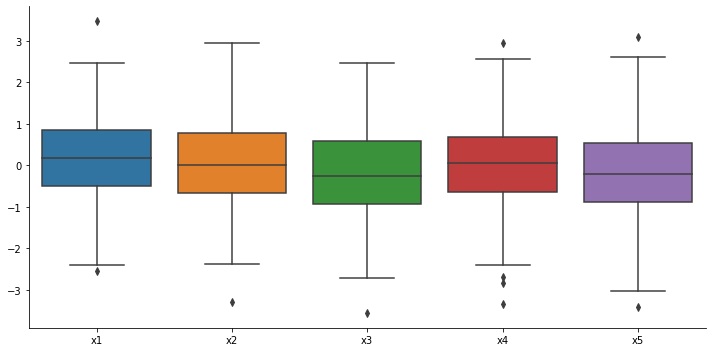

In [46]:
sns.catplot(data=df_input, kind='box', aspect=2)

plt.show()

Yes the inputs roughly cover the same range.

### 2d)
Are the inputs highly correlated or anticorrelated with each other?

#### 2d) - SOLUTION

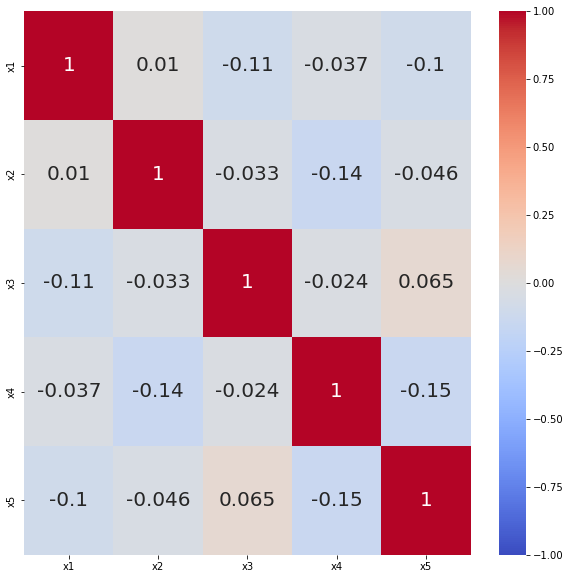

In [47]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data = df_input.corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 20},
            ax=ax)

plt.show()

### 2e)
You will fit three logistic regression models to the data. You must use the `statsmodels` formula api to fit the models.

You must fit the following logistic regression models:

* All linear additive terms
* All pair-wise interactions between the inputs
* Up to all 4-way interactions between the inputs

Assign the model with linear additive terms to the object, `fit2_add`. Assign the model with up to all pair-wise interactions to the object, `fit2_pairs`. Assign the model with up to all 4-way interactions between the inputs to the object `fit2_4way`.  

Display the summary of each model to the screen.

#### 2e) - SOLUTION

In [48]:
formula_add = 'y ~ x1 + x2 + x3 + x4 + x5'
formula_pairs = 'y ~ (x1 + x2 + x3 + x4 + x5) ** 2'
formula_4way = 'y ~ (x1 + x2 + x3 + x4 + x5) ** 4'

In [49]:
fit2_add = smf.logit(formula = formula_add, data = df_2).fit()

Optimization terminated successfully.
         Current function value: 0.658346
         Iterations 5


In [50]:
print(fit2_add.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  220
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                 0.04657
Time:                        16:24:57   Log-Likelihood:                -144.84
converged:                       True   LL-Null:                       -151.91
Covariance Type:            nonrobust   LLR p-value:                   0.01470
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2548      0.147     -1.730      0.084      -0.543       0.034
x1            -0.0075      0.143     -0.053      0.958      -0.288       0.273
x2             0.0335      0.134      0.250      0.8

In [51]:
fit2_pairs = smf.logit(formula = formula_pairs, data = df_2).fit()

Optimization terminated successfully.
         Current function value: 0.454774
         Iterations 8


In [52]:
print(fit2_pairs.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  220
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                           15
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.3414
Time:                        16:24:58   Log-Likelihood:                -100.05
converged:                       True   LL-Null:                       -151.91
Covariance Type:            nonrobust   LLR p-value:                 2.563e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4839      0.201     -2.406      0.016      -0.878      -0.090
x1            -0.0237      0.202     -0.117      0.907      -0.420       0.373
x2             0.0935      0.197      0.475      0.6

In [53]:
fit2_4way = smf.logit(formula = formula_4way, data = df_2).fit()

Optimization terminated successfully.
         Current function value: 0.416135
         Iterations 8


In [54]:
print(fit2_4way.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  220
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                           30
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.3973
Time:                        16:24:58   Log-Likelihood:                -91.550
converged:                       True   LL-Null:                       -151.91
Covariance Type:            nonrobust   LLR p-value:                 7.724e-13
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4066      0.224     -1.815      0.069      -0.845       0.032
x1             -0.0709      0.252     -0.282      0.778      -0.564       0.422
x2              0.1159      0.241      0.482    

### 2f)
The additive and pair-wise interaction models are subsets of the model with up to all 4-way interactions. Thus, all three models have some features in common. Which features are statistically significant (based on the 5% significance level, thus using the 95% confidence interval) in the three models? Are any features significant in all three models?

#### 2f) - SOLUTION

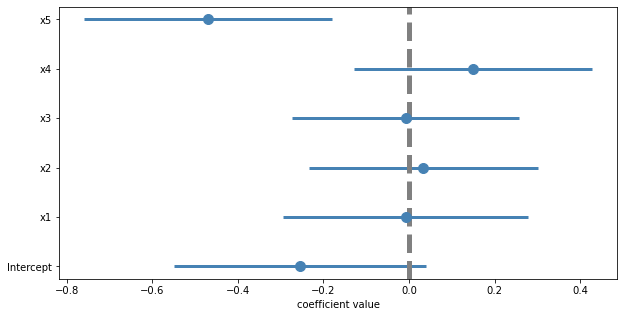

In [55]:
my_coefplot(fit2_add)

The `x5` feature is statistically significant in this model. 

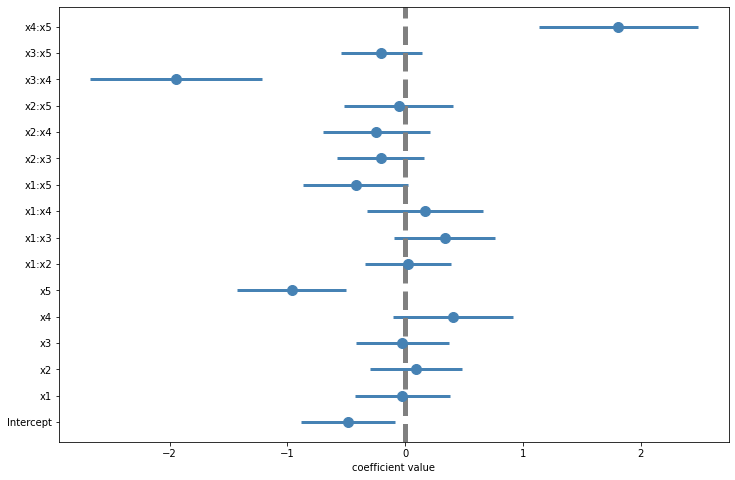

In [56]:
my_coefplot(fit2_pairs, figsize_use=(12,8))

The `x5` feature and the interaction between `x3:x4` and `x4:x5` is statistically significant in this model. 

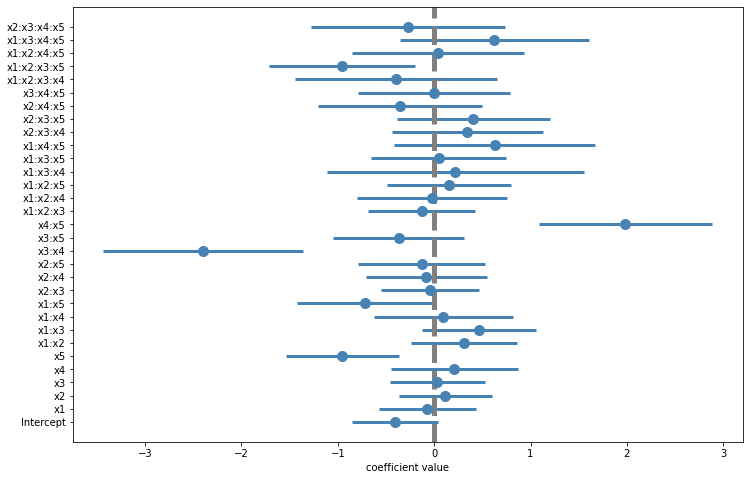

In [57]:
my_coefplot(fit2_4way, figsize_use=(12,8))

The `x5` feature and the interaction between `x3:x4`, `x4:x5`, `x1:x2:x3:x5` is statistically significant in this model. 

### 2g)
You will now use stratified 5-fold cross-validation to train and assess the three logistic regression models. The relevant methods from sklearn are imported for you in the cell below.

In [58]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

You must set the `penalty` argument to `'none'` for all three models. You should use the `cross_val_score()` function to train and assess the model performance based on the `'accuracy'` scoring function. You do not need to standardize the features for the exam.

Which of the three models is considered the best performing model based on cross-validation?

#### 2g) - SOLUTION

In [59]:
k05_stratify = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [60]:
y_add, X_add = dmatrices(formula_add + ' - 1', data = df_2)

In [61]:
y_pairs, X_pairs = dmatrices(formula_pairs + ' - 1', data = df_2)

In [62]:
y_4way, X_4way = dmatrices(formula_4way + ' - 1', data = df_2)

In [63]:
fit2_all_mle = LogisticRegression(penalty='none', solver='lbfgs', max_iter=5001, fit_intercept=False)

fit2_pairs_mle = LogisticRegression(penalty='none', solver='lbfgs', max_iter=5001, fit_intercept=False)

fit2_4way_mle = LogisticRegression(penalty='none', solver='lbfgs', max_iter=5001, fit_intercept=False)

In [64]:
test_accuracy_fit2_all_mle = cross_val_score( fit2_all_mle, X_add, y_add.ravel(), cv=k05_stratify)

test_accuracy_fit2_pairs_mle = cross_val_score( fit2_pairs_mle, X_pairs, y_pairs.ravel(), cv=k05_stratify)

test_accuracy_fit2_4way_mle = cross_val_score( fit2_4way_mle, X_4way, y_4way.ravel(), cv=k05_stratify)


In [65]:
test_accuracy_fit2_all_mle

array([0.52272727, 0.72727273, 0.5       , 0.61363636, 0.54545455])

In [66]:
test_accuracy_fit2_all_mle.mean()

0.5818181818181818

In [67]:
test_accuracy_fit2_pairs_mle

array([0.72727273, 0.63636364, 0.70454545, 0.70454545, 0.63636364])

In [68]:
test_accuracy_fit2_pairs_mle.mean()

0.6818181818181819

In [69]:
test_accuracy_fit2_4way_mle

array([0.68181818, 0.72727273, 0.63636364, 0.70454545, 0.61363636])

In [70]:
test_accuracy_fit2_4way_mle.mean()

0.6727272727272727

Based on the cross-validation the model with all pairs interaction performs the best.

### 2h) 
Regardless of your answer to 2g), you will train a logistic regression model with up to all pair-wise interactions applying the Lasso penalty. You will tune the `C` (inverse regularization strength) parameter using stratified 5-fold cross-validation. You may use the built-in cross-validation method for logistic regression, which is imported in for you below.

In [71]:
from sklearn.linear_model import LogisticRegressionCV

You must set the `penalty` argument to `l1` in `LogisticRegressionCV()` and you must consider 101 `C` parameter values.

Assign the result to the `lasso_cv_2` object.

Which value of `C` is considered the optimal or best value?

#### 2h) - SOLUTION

In [72]:
lasso_cv_2 = LogisticRegressionCV(penalty='l1', Cs=101, cv=k05_stratify, solver='saga', max_iter=5001, fit_intercept=False).\
fit(X_4way, y_4way.ravel())

Optmial value of `C`

In [73]:
lasso_cv_2.C_

array([0.57543994])

### 2i)
Display the coefficients associated with the best lasso model to the screen. How many coefficients have been "turned off" and thus set to zero?

#### 2i) - SOLUTION

In [74]:
lasso_cv_2.coef_ 

array([[-0.01586754,  0.        ,  0.00199414,  0.12383181, -0.56970867,
         0.17253517,  0.31081716,  0.        , -0.37372993, -0.03314577,
         0.        , -0.09090809, -1.55316879, -0.10921742,  1.39582542,
         0.        ,  0.        ,  0.        ,  0.01628481,  0.        ,
         0.18780655,  0.        ,  0.2976327 , -0.02837006,  0.        ,
        -0.07643132, -0.58024382,  0.        ,  0.29223338, -0.01238973]])

10 coefficients have been turned off

## BONUS - 7 points

The Wisconsin Breast Cancer data set is imported in for you in the cell below. The data set is a classification data set, with the input features assigned to the `b_features` object and the binary outcome assigned to the `y_class` object. The `b_features` object is converted to a Pandas DataFrame for you and assigned to the `b_df` object.

In [75]:
from sklearn.datasets import load_breast_cancer

b_features, y_class = load_breast_cancer(return_X_y=True)

b_df = pd.DataFrame(b_features, columns=['X'+str(d).zfill(2) for d in range(b_features.shape[1])])

In [76]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X00     569 non-null    float64
 1   X01     569 non-null    float64
 2   X02     569 non-null    float64
 3   X03     569 non-null    float64
 4   X04     569 non-null    float64
 5   X05     569 non-null    float64
 6   X06     569 non-null    float64
 7   X07     569 non-null    float64
 8   X08     569 non-null    float64
 9   X09     569 non-null    float64
 10  X10     569 non-null    float64
 11  X11     569 non-null    float64
 12  X12     569 non-null    float64
 13  X13     569 non-null    float64
 14  X14     569 non-null    float64
 15  X15     569 non-null    float64
 16  X16     569 non-null    float64
 17  X17     569 non-null    float64
 18  X18     569 non-null    float64
 19  X19     569 non-null    float64
 20  X20     569 non-null    float64
 21  X21     569 non-null    float64
 22  X2

You must use stratified cross-validation to tune a logistic regression model with the Elastic Net penalty. You **must** use Pipeline to properly standardize the features before training the logistic regression model. You should tune the `l1_ratio` and `C` parameter with grid search. The relevant methods are imported in for you below.

In [77]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

In [78]:
# add as many cells as you feel are necessary

In [79]:
xinputs = b_df.select_dtypes('number').copy()

In [80]:
X_train = xinputs.to_numpy()

In [81]:
type(X_train)

numpy.ndarray

In [82]:
type(y_class)

numpy.ndarray

In [83]:
y_class.shape

(569,)

In [84]:
enet_to_fit = LogisticRegression(penalty='elasticnet', solver='saga', random_state=101, max_iter=10001)

In [85]:
enet_cv_wflow = Pipeline( steps = [('std_inputs', StandardScaler()), 
                                   ('enet', enet_to_fit)] )

In [86]:
enet_grid = {'enet__C': np.exp(np.linspace(-6, 6, num=11)),
             'enet__l1_ratio': np.linspace(0, 1, num=5)}

In [87]:
enet_search = GridSearchCV(enet_cv_wflow, param_grid=enet_grid, cv=k05_stratify)

In [88]:
enet_search_results = enet_search.fit(X_train, y_class)

In [89]:
enet_search_results.best_params_

{'enet__C': 0.301194211912202, 'enet__l1_ratio': 0.0}

In [90]:
enet_search_results.best_score_

0.982425089271852

### BONUS - 8 points
You must use stratified cross-validation to tune Principal Component (PC) based logistic regression. You must tune the number of PCs to retain with the `penalty` term set to `'none'` in the logistic regression model. You **muse** use Pipeline to properly standardize the features before performing PCA and training the logistic regression model. You should tune the `n_components` with grid search. The relevant methods are imported in for you below.

In [91]:
from sklearn.decomposition import PCA

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
# add as many cells as you feel are necessary

In [94]:
fit = LogisticRegression(penalty='none', solver='saga', random_state=101, max_iter=10001)

In [95]:
pca_interact_wflow = Pipeline( steps=[('std_inputs', StandardScaler()), 
                                      ('pca', PCA()), 
                                      ('make_pairs', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), 
                                      ('fit', fit)] )

In [96]:
pca_interact_grid = {'pca__n_components': [3, 5, 9, 15]}

In [97]:
pca_interact_search = GridSearchCV( pca_interact_wflow, pca_interact_grid, cv=k05_stratify )

In [98]:
pca_interact_search_results = pca_interact_search.fit(X_train, y_class)

In [99]:
pca_interact_search_results.best_params_

{'pca__n_components': 9}

In [100]:
pca_interact_search_results.best_score_

0.971852196863841